## Observations and Insights 

3 Observations and Insights About this Data:
    
    1. My first observation is about the correlation between the weight of each mouse and their tumor volume. The correlation coefficient is 0.8419. This is a high correlation coefficient, suggesting that there is a strong positive corrlation between mouse's weight and their tumor volume. 
     
    2. By looking at the piechart, we can conclude that the number of female and male mice are about 50% in each catagory. However, if we are looking at the bar graph, we can conclude that Capomulin and Ramicane are used more often in the study since there are more mice using those two drug regimen. 
    
    3. By looking at the line graph for a specific mouse ("W914") that is treated by Capomulin, we can see that capomulin definately helped decrease the tumor volume in Mouse ID: W914. There is a significant drop in tumor volume day 35 to day 40. Suggesting that, Capomulin could works to reduce the tumor volume. However, it might take some time to have te tumor volume to reduce significantly 

In [ ]:
%matplotlib inline

In [5]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
mouse_com = pd.merge(mouse_metadata, study_results, how="outer", on=["Mouse ID"])

# Display the data table for preview
mouse_com.head(10)

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
5,k403,Ramicane,Male,21,16,25,33.464577,1
6,k403,Ramicane,Male,21,16,30,31.099498,1
7,k403,Ramicane,Male,21,16,35,26.546993,1
8,k403,Ramicane,Male,21,16,40,24.365505,1
9,k403,Ramicane,Male,21,16,45,22.050126,1


In [39]:
# Checking the number of mice.
tot_mice = mouse_com['Mouse ID'].nunique()
tot_mice
print('The total number of mice: ' + str(tot_mice))

The total number of mice: 249


In [7]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
dupli_mice = mouse_com.loc[mouse_com.duplicated(subset=['Mouse ID','Timepoint',]),'Mouse ID'].unique()
pd.DataFrame(dupli_mice)

,0
0,g989


In [9]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
# Exclude Mouse IF g989
update_mouse = mouse_com[mouse_com['Mouse ID'] != 'g989']
update_mouse.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [43]:
# Checking the number of mice in the clean DataFrame.
update_mice_count = update_mouse['Mouse ID'].nunique()
update_mice_count
print('The total number of mice after data cleaning: ' + str(update_mice_count))

The total number of mice after data cleaning: 248


## Summary Statistics

In [ ]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.



In [12]:
#Summary Stats for Tumor Volume grouped by Drug Regimen
grouped_drug = update_mouse.groupby('Drug Regimen')
tumor_mean = grouped_drug['Tumor Volume (mm3)'].mean()
tumor_med = grouped_drug['Tumor Volume (mm3)'].median()
tumor_var = grouped_drug['Tumor Volume (mm3)'].var()
tumor_sd = grouped_drug['Tumor Volume (mm3)'].std()
tumor_sem = grouped_drug['Tumor Volume (mm3)'].sem()

# Storing the summary stats into a data frame
drug_sum = {"Tumor Vol Mean": tumor_mean,"Tumor Vol Median": tumor_med,"Tumor Vol Variance": tumor_var,
           "Tumor Vol Standard Deviation": tumor_sd, "Tumor Vol SEM": tumor_sem}
drug_summary = pd.DataFrame(drug_sum)
drug_summary

,Tumor Vol Mean,Tumor Vol Median,Tumor Vol Variance,Tumor Vol Standard Deviation,Tumor Vol SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

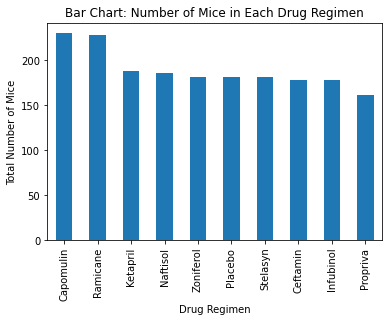

In [81]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.
grouped_drug.head(10)
drug_bar = mouse_com['Drug Regimen'].value_counts()
drug_bar.plot(kind = 'bar', xlabel = "Drug Regimen", ylabel = "Total Number of Mice", 
              title = "Bar Chart: Number of Mice in Each Drug Regimen")
plt.show()

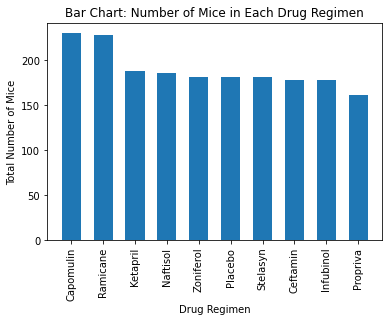

In [82]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.
x_axis = np.arange(len(drug_bar))
plt.bar(x_axis,drug_bar,width = 0.6)
plt.xlabel("Drug Regimen")
plt.ylabel("Total Number of Mice")
plt.title("Bar Chart: Number of Mice in Each Drug Regimen")
ticks_name = [val for val in x_axis]
plt.xticks(ticks_name, drug_bar.index.values, rotation = "vertical")
plt.xlim(-0.75,len(x_axis)-0.25)
plt.show()

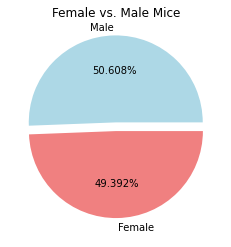

In [83]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
sex = mouse_com['Sex'].value_counts()
sex.plot(kind = 'pie', title = "Female vs. Male Mice",explode = (0.1,0), colors = ("lightblue","lightcoral"),autopct = "%1.3f%%",ylabel = "")
plt.show()

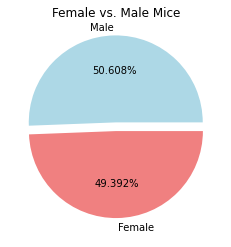

In [16]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
labels = ["Male","Female"]
colors = ['lightblue','lightcoral']
explode = (0.1 , 0)
plt.pie(sex, labels=labels, colors=colors, explode = explode, autopct = "%1.3f%%")
plt.title("Female vs. Male Mice")
plt.show()

## Quartiles, Outliers and Boxplots

In [17]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
capomulin = mouse_com.loc[mouse_com['Drug Regimen']=='Capomulin', :]
ramicane = mouse_com.loc[mouse_com['Drug Regimen']=='Ramicane', :]
infubinol = mouse_com.loc[mouse_com['Drug Regimen']=='Infubinol', :]
ceftamin = mouse_com.loc[mouse_com['Drug Regimen']=='Ceftamin', :]

# Start by getting the last (greatest) timepoint for each mouse
cap_last = pd.DataFrame(capomulin.groupby('Mouse ID').max()['Timepoint'])
ram_last = pd.DataFrame(ramicane.groupby('Mouse ID').max()['Timepoint'])
inf_last = pd.DataFrame(infubinol.groupby('Mouse ID').max()['Timepoint'])
cef_last = pd.DataFrame(ceftamin.groupby('Mouse ID').max()['Timepoint'])

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
cap_merge = pd.merge(cap_last,mouse_com,how='left', on =('Mouse ID','Timepoint'))
ram_merge = pd.merge(ram_last,mouse_com,how='left', on =('Mouse ID','Timepoint'))
inf_merge = pd.merge(inf_last,mouse_com,how='left', on =('Mouse ID','Timepoint'))
cef_merge = pd.merge(cef_last,mouse_com,how='left', on =('Mouse ID','Timepoint'))

cap_merge.head()

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,b128,45,Capomulin,Female,9,22,38.982878,2
1,b742,45,Capomulin,Male,7,21,38.939633,0
2,f966,20,Capomulin,Male,16,17,30.485985,0
3,g288,45,Capomulin,Male,3,19,37.074024,1
4,g316,45,Capomulin,Female,22,22,40.159220,2


In [18]:
# Calculate the IQR and quantitatively determine if there are any potential outliers. 
# Capomulin Summary
cap_summary = cap_merge['Tumor Volume (mm3)']
cap_summary
q_cap = cap_summary.quantile([0.25,0.5,0.75])
lowerq_cap = q_cap[0.25]
upperq_cap = q_cap[0.75]
iqr_cap = upperq_cap - lowerq_cap
lower_bound_cap = lowerq_cap - (1.5*iqr_cap)
upper_bound_cap = upperq_cap + (1.5*iqr_cap)
print('Capomulin Summary')
print('')
print(f'Lower Quartile(Q1): {lowerq_cap}')
print(f'Upper Quartile(Q3): {upperq_cap}')
print(f'IQR (Q3-Q1): {iqr_cap}')
print(f'Lower Bound: {lower_bound_cap}')
print(f'Upper BOund: {upper_bound_cap}')
out_cap = cap_merge.loc[(cap_merge['Tumor Volume (mm3)'] < lower_bound_cap) | 
                        (cap_merge['Tumor Volume (mm3)'] > upper_bound_cap)]

if ((lower_bound_cap > cap_summary.min()) | (upper_bound_cap < cap_summary.max())):
    print(f'Outliers: Outliers falls below {lower_bound_cap} & above {upper_bound_cap}. These are the outliers')
    print (out_cap)
else:
    print(f'Outliers: Outliers falls below {lower_bound_cap} & above {upper_bound_cap}. There are no outliers.')
    
    

Capomulin Summary

Lower Quartile(Q1): 32.37735684
Upper Quartile(Q3): 40.1592203
IQR (Q3-Q1): 7.781863460000004
Lower Bound: 20.70456164999999
Upper BOund: 51.83201549
Outliers: Outliers falls below 20.70456164999999 & above 51.83201549. There are no outliers.


In [19]:
# Ramicane Summary
ram_summary = ram_merge['Tumor Volume (mm3)']
ram_summary
q_ram = ram_summary.quantile([0.25,0.5,0.75])
lowerq_ram = q_ram[0.25]
upperq_ram = q_ram[0.75]
iqr_ram = upperq_ram - lowerq_ram
lower_bound_ram = lowerq_ram - (1.5*iqr_ram)
upper_bound_ram = upperq_ram + (1.5*iqr_ram)

print('Ramicane Summary')
print('')
print(f'Lower Quartile(Q1): {lowerq_ram}')
print(f'Upper Quartile(Q3): {upperq_ram}')
print(f'IQR (Q3-Q1): {iqr_ram}')
print(f'Lower Bound: {lower_bound_ram}')
print(f'Upper BOund: {upper_bound_ram}')
out_ram = ram_merge.loc[(ram_merge['Tumor Volume (mm3)'] < lower_bound_ram) | 
                        (ram_merge['Tumor Volume (mm3)'] > upper_bound_ram)]

if ((lower_bound_ram > ram_summary.min()) | (upper_bound_ram < ram_summary.max())):
    print(f'Outliers: Outliers falls below {lower_bound_ram} & above {upper_bound_ram}. These are the outliers')
    print (out_ram)
else:
    print(f'Outliers: Outliers falls below {lower_bound_ram} & above {upper_bound_ram}. There are no outliers.')
    

Ramicane Summary

Lower Quartile(Q1): 31.56046955
Upper Quartile(Q3): 40.65900627
IQR (Q3-Q1): 9.098536719999998
Lower Bound: 17.912664470000003
Upper BOund: 54.30681135
Outliers: Outliers falls below 17.912664470000003 & above 54.30681135. There are no outliers.


In [20]:
# Infubinol Summary
inf_summary = inf_merge['Tumor Volume (mm3)']
inf_summary
q_inf = inf_summary.quantile([0.25,0.5,0.75])
lowerq_inf = q_inf[0.25]
upperq_inf = q_inf[0.75]
iqr_inf = upperq_inf - lowerq_inf
lower_bound_inf = lowerq_inf - (1.5*iqr_inf)
upper_bound_inf = upperq_inf + (1.5*iqr_inf)


print('Infubinol Summary')
print('')
print(f'Lower Quartile(Q1): {lowerq_inf}')
print(f'Upper Quartile(Q3): {upperq_inf}')
print(f'IQR (Q3-Q1): {iqr_inf}')
print(f'Lower Bound: {lower_bound_inf}')
print(f'Upper BOund: {upper_bound_inf}')
out_inf = inf_merge.loc[(inf_merge['Tumor Volume (mm3)'] < lower_bound_inf) | 
                        (inf_merge['Tumor Volume (mm3)'] > upper_bound_inf)]

if ((lower_bound_inf > inf_summary.min()) | (upper_bound_inf < inf_summary.max())):
    print(f'Outliers: Outliers falls below {lower_bound_inf} & above {upper_bound_inf}. These are the outliers:')
    print('')
    print (out_inf)
else:
    print(f'Outliers: Outliers falls below {lower_bound_inf} & above {upper_bound_inf}. There are no outliers.')
    


Infubinol Summary

Lower Quartile(Q1): 54.04860769
Upper Quartile(Q3): 65.52574285
IQR (Q3-Q1): 11.477135160000003
Lower Bound: 36.83290494999999
Upper BOund: 82.74144559000001
Outliers: Outliers falls below 36.83290494999999 & above 82.74144559000001. These are the outliers:

  Mouse ID  Timepoint Drug Regimen     Sex  Age_months  Weight (g)  \
5     c326          5    Infubinol  Female          18          25   

   Tumor Volume (mm3)  Metastatic Sites  
5           36.321346                 0  


In [21]:
# Ceftamin Summary
cef_summary = cef_merge['Tumor Volume (mm3)']
cef_summary
q_cef = cef_summary.quantile([0.25,0.5,0.75])
lowerq_cef = q_cef[0.25]
upperq_cef = q_cef[0.75]
iqr_cef = upperq_cef - lowerq_cef
lower_bound_cef = lowerq_cef - (1.5*iqr_cef)
upper_bound_cef = upperq_cef + (1.5*iqr_cef)


print('Ceftamin Summary')
print('')
print(f'Lower Quartile(Q1): {lowerq_cef}')
print(f'Upper Quartile(Q3): {upperq_cef}')
print(f'IQR (Q3-Q1): {iqr_cef}')
print(f'Lower Bound: {lower_bound_cef}')
print(f'Upper BOund: {upper_bound_cef}')
out_cef = cef_merge.loc[(cef_merge['Tumor Volume (mm3)'] < lower_bound_cef) | 
                        (cef_merge['Tumor Volume (mm3)'] > upper_bound_cef)]

if ((lower_bound_cef > cef_summary.min()) | (upper_bound_cef < cef_summary.max())):
    print(f'Outliers: Outliers falls below {lower_bound_cef} & above {upper_bound_cef}. These are the outliers')
    print (out_cef)
else:
    print(f'Outliers: Outliers falls below {lower_bound_cef} & above {upper_bound_cef}. There are no outliers.')
    

Ceftamin Summary

Lower Quartile(Q1): 48.72207785
Upper Quartile(Q3): 64.29983003
IQR (Q3-Q1): 15.577752179999997
Lower Bound: 25.355449580000002
Upper BOund: 87.66645829999999
Outliers: Outliers falls below 25.355449580000002 & above 87.66645829999999. There are no outliers.


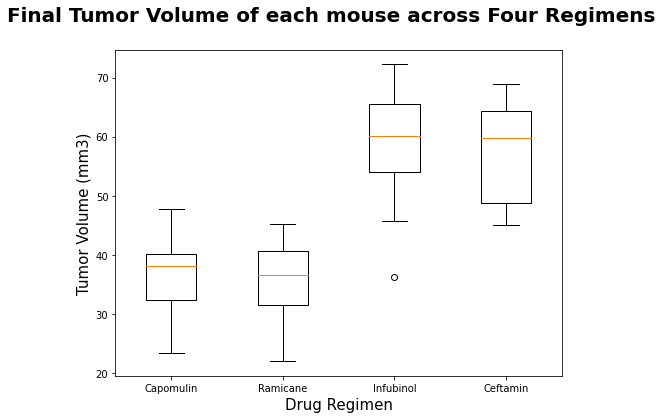

In [85]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
fig,ax = plt.subplots(figsize=(8,6))
fig.suptitle('Final Tumor Volume of each mouse across Four Regimens',fontsize=20, fontweight="bold")
ax.boxplot([cap_summary,ram_summary,inf_summary,cef_summary], labels = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin'])
ax.set_xlabel('Drug Regimen',fontsize =15)
ax.set_ylabel('Tumor Volume (mm3)',fontsize = 15)
plt.show()

## Line and Scatter Plots

In [23]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin: Mouse ID w914
capomulin_w914 = capomulin.loc[capomulin['Mouse ID']== 'w914', : ]
capomulin_w914


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
215,w914,Capomulin,Male,24,21,0,45.000000,0
216,w914,Capomulin,Male,24,21,5,45.893720,0
217,w914,Capomulin,Male,24,21,10,43.231963,0
218,w914,Capomulin,Male,24,21,15,43.688449,0
219,w914,Capomulin,Male,24,21,20,41.108092,0
220,w914,Capomulin,Male,24,21,25,40.291917,0
221,w914,Capomulin,Male,24,21,30,40.993110,0
222,w914,Capomulin,Male,24,21,35,41.664916,1
223,w914,Capomulin,Male,24,21,40,35.611309,2
224,w914,Capomulin,Male,24,21,45,36.041047,2


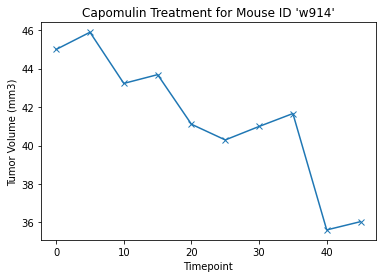

In [24]:
# Line Graph using Matplotlib
plt.plot(capomulin_w914['Timepoint'],capomulin_w914['Tumor Volume (mm3)'],marker = 'x')
plt.title("Capomulin Treatment for Mouse ID 'w914'")
plt.xlabel('Timepoint')
plt.ylabel('Tumor Volume (mm3)')
plt.show()

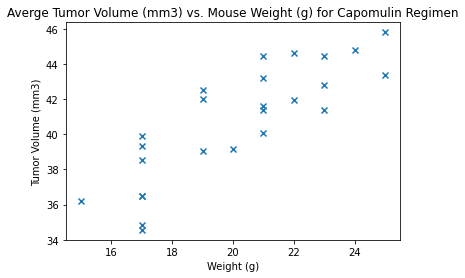

In [25]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
cap_group = capomulin.groupby('Mouse ID')
cap_avg = cap_group.mean()
cap_avg
plt.scatter(cap_avg['Weight (g)'] , cap_avg['Tumor Volume (mm3)'],marker = 'x')
plt.title('Averge Tumor Volume (mm3) vs. Mouse Weight (g) for Capomulin Regimen')
plt.xlabel('Weight (g)')
plt.ylabel('Tumor Volume (mm3)')
plt.show()

## Correlation and Regression

In [77]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
corr1 = st.pearsonr(cap_avg['Weight (g)'],cap_avg['Tumor Volume (mm3)'])[0]

# rvalue should be the same as corr1
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(cap_avg['Weight (g)'], cap_avg['Tumor Volume (mm3)'])

#y = mx + b
reg_line = slope * cap_avg['Weight (g)'] + intercept

print(f'The Correlation Coefficient for mouse weight and average Tumor Volume for Capolulin regimen is: {corr1}')
print(f'The Slope for mouse weight and average Tumr Volume for Capolulin regimen is: {slope}')
print(f'The Intercept for mouse weight and average Tumr Volume for Capolulin regimen is: {intercept}')
print(f'The p-value for mouse weight and average Tumr Volume for Capolulin regimen is: {pvalue}')

linear_eq = 'y = ' + str(round(slope,4))+ 'x + ' + str(round(intercept,4))
print(linear_eq)


The Correlation Coefficient for mouse weight and average Tumor Volume for Capolulin regimen is: 0.8419363424694717
The Slope for mouse weight and average Tumr Volume for Capolulin regimen is: 0.9544396890241045
The Intercept for mouse weight and average Tumr Volume for Capolulin regimen is: 21.552160532685015
The p-value for mouse weight and average Tumr Volume for Capolulin regimen is: 1.3225722434712642e-07
y = 0.9544x + 21.5522


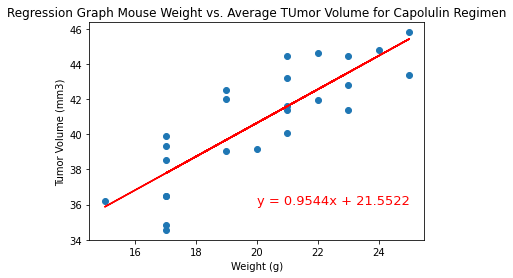

In [79]:
# Scatter Plot with Linear regression Line 
plt.scatter(cap_avg['Weight (g)'],cap_avg['Tumor Volume (mm3)'])
plt.plot(cap_avg['Weight (g)'],reg_line, 'r-')
plt.annotate(linear_eq,(20,36),fontsize = 13,color = 'red')
plt.title('Regression Graph Mouse Weight vs. Average TUmor Volume for Capolulin Regimen')
plt.xlabel('Weight (g)')
plt.ylabel('Tumor Volume (mm3)')
plt.show()